<a href="https://colab.research.google.com/github/Wilson0503/TKU-AI-412630781/blob/main/10_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pytesseract
!pip install opencv-python
!apt-get install tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [8]:
import cv2
import pytesseract

# 載入圖像
image_path = '/content/sample_data/images (4).jpeg'
image = cv2.imread(image_path)

# 將圖像轉換為灰度
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 使用圖像處理技術進行前處理（例如，去噪、二值化等）
# ...

# 使用OCR進行車牌辨識
plate_text = pytesseract.image_to_string(gray, config='--psm 7')

# 輸出識別結果
print("車牌號碼：", plate_text)


車牌號碼： acc8888



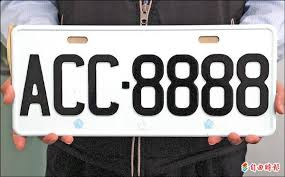

In [9]:
import cv2
import pytesseract

# 載入圖像
image_path = '/content/sample_data/images (4).jpeg'
image = cv2.imread(image_path)

# 將圖像轉換為灰度
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 使用高斯模糊減少噪點
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# 使用Sobel算子檢測邊緣
sobelx = cv2.Sobel(blurred, cv2.CV_8U, 1, 0, ksize=3)
_, threshold = cv2.threshold(sobelx, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 進行形態學操作，閉運算填充車牌區域
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
closed = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)

# 尋找輪廓
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# 遍歷輪廓，找到車牌區域
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 1000:  # 根據需要調整車牌區域的面積閾值
        x, y, w, h = cv2.boundingRect(contour)
        plate = image[y:y+h, x:x+w]

        # 使用Tesseract進行文字辨識
        text = pytesseract.image_to_string(plate)

        # 輸出辨識結果
        print("車牌號碼:", text)

        # 將車牌號碼印出
        print("提取到的車牌號碼:", text)
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# 顯示圖像
from google.colab.patches import cv2_imshow
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
